In [1]:
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.manifold import LocallyLinearEmbedding as LLE
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
import numpy as np
Axes3D

mpl_toolkits.mplot3d.axes3d.Axes3D

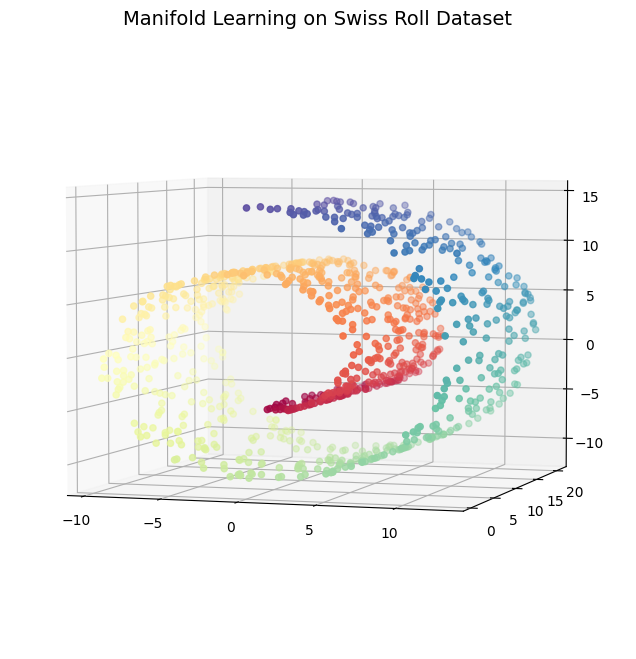

In [2]:
#We load the swiss roll dataset
X, color = datasets.make_swiss_roll(1000, random_state=0) 
n_neighbors = 10
n_components = 2 #projecting into 2-d
# Creating the plot
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Manifold Learning on Swiss Roll Dataset", fontsize=14)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

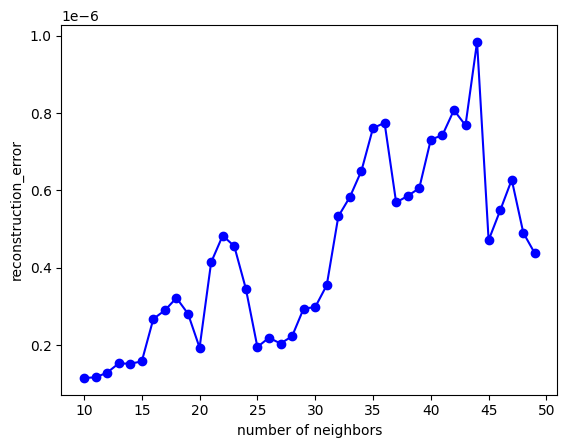

In [3]:
score_LLE = []
for k in range(10,50):
    LLE =manifold.LocallyLinearEmbedding(n_neighbors=k, n_components=n_components, eigen_solver='auto')
    Y = LLE.fit_transform(X)
    score_LLE.append(LLE.reconstruction_error_)

plt.plot(range(10,50), score_LLE, 'bo-')
plt.xlabel('number of neighbors')
plt.ylabel('reconstruction_error')
plt.show()

/Users/adikondepudi/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/adikondepudi/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/adikondepudi/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/adikondepudi/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will chang

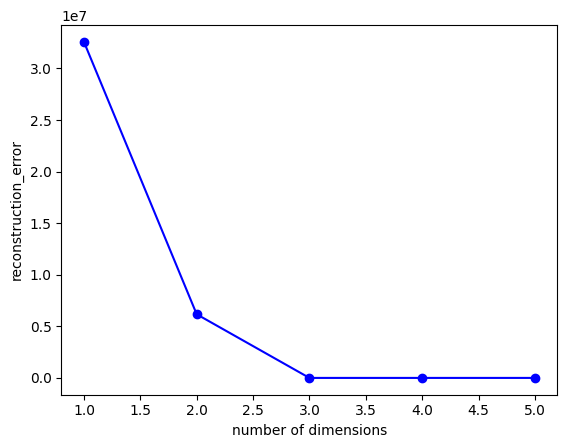

In [4]:
score_mds = []
for k in range(1,6):
    mds = MDS(n_components=k, random_state=1)
    Y = mds.fit_transform(X)
    score_mds.append(mds.stress_)

plt.plot(range(1,6), score_mds, 'bo-')
plt.xlabel('number of dimensions')
plt.ylabel('reconstruction_error')
plt.show()

/Users/adikondepudi/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/adikondepudi/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/adikondepudi/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/adikondepudi/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will chang

MDS (1-100) (1.3e+03 sec)


ValueError: x and y must have same first dimension, but have shapes (5,) and (99,)

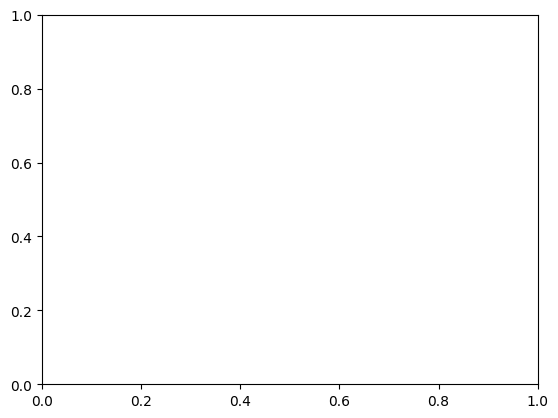

In [7]:
score_mds = []
t0 = time()
for k in range(1,100):
    mds = MDS(n_components=k, random_state=1)
    Y = mds.fit_transform(X)
    score_mds.append(mds.stress_)
t1 = time()
print("MDS (1-100) (%.2g sec)" % (t1 - t0))
plt.plot(range(1,6), score_mds, 'bo-')
ax2.set_title("MDS (1-100) (%.2g sec)" % (t1 - t0))
plt.xlabel('number of dimensions')
plt.ylabel('reconstruction_error')
plt.show()